In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Evaluation of the LAMP framework
To start, transform and evaluate the lottie-android
```
# Clone and checkout
cd input && git clone https://github.com/google/gson.git && cd gson && git checkout 2ce6a610 && cd ...

# In the TUI:
transform -in input/gson/gson/src/main/java -out out/gson
evaluate -in out/gson -out evaluation/data/lamp-gson
```

# Designite Metrics

In [90]:
df_types = pd.read_csv('data/designite-gson/TypeMetrics.csv', usecols=["Package Name", "Type Name", "NOF", "NOM", "NOPF", "NOPM", "LOC", "WMC", "NC", "DIT", "LCOM", "FANIN", "FANOUT"])
df_types.insert(0, "DeclarableId", df_types[['Package Name', 'Type Name']].agg('.'.join, axis=1))
df_types.drop(["Package Name", "Type Name"], axis="columns", inplace=True)

df_methods = pd.read_csv('data/designite-gson/MethodMetrics.csv', usecols=["Package Name", "Type Name", "Method Name", "LOC", "CC", "PC"])
df_methods.insert(0, "DeclarableId", df_methods[['Package Name', 'Type Name']].agg('.'.join, axis=1))
df_methods["DeclarableId"] = df_methods[['DeclarableId', 'Method Name']].agg('://'.join, axis=1)
df_methods.drop(["Package Name", "Type Name", "Method Name"], axis="columns", inplace=True)

In [91]:
print(df_types)

                                         DeclarableId  NOF  NOPF  NOM  NOPM  \
0                           com.google.gson.JsonArray    1     0   33    32   
1                    com.google.gson.ToNumberStrategy    0     0    1     1   
2                         com.google.gson.JsonElement    0     0   23    23   
3              com.google.gson.ReflectionAccessFilter    4     0    5     4   
4   com.google.gson.ReflectionAccessFilter.FilterR...    0     0    0     0   
..                                                ...  ...   ...  ...   ...   
89    com.google.gson.internal.bind.util.ISO8601Utils    2     0    8     4   
90    com.google.gson.internal.sql.SqlTimeTypeAdapter    2     0    4     3   
91       com.google.gson.internal.sql.SqlTypesSupport    6     6    3     0   
92    com.google.gson.internal.sql.SqlDateTypeAdapter    2     0    4     3   
93  com.google.gson.internal.sql.SqlTimestampTypeA...    2     0    4     3   

    LOC  WMC  NC  DIT  LCOM  FANIN  FANOUT  
0   28

In [92]:
print(df_methods)

                                          DeclarableId  LOC  CC  PC
0                com.google.gson.JsonArray://JsonArray    3   1   0
1                com.google.gson.JsonArray://JsonArray    3   1   1
2                 com.google.gson.JsonArray://deepCopy   10   3   0
3                      com.google.gson.JsonArray://add    3   1   1
4                      com.google.gson.JsonArray://add    3   1   1
..                                                 ...  ...  ..  ..
727  com.google.gson.internal.sql.SqlDateTypeAdapte...   11   2   2
728  com.google.gson.internal.sql.SqlTimestampTypeA...    9   2   2
729  com.google.gson.internal.sql.SqlTimestampTypeA...    3   1   1
730  com.google.gson.internal.sql.SqlTimestampTypeA...    4   1   1
731  com.google.gson.internal.sql.SqlTimestampTypeA...    3   1   2

[732 rows x 4 columns]


# SonarQube metrics

In [93]:
# df_sonar = pd.read_csv('data/sonarqube-gson/CognitiveComplexity.csv', usecols=["DeclarableId","S_COCO", "S_LOC"])
# df_sonar['DeclarableId'] = df_sonar['DeclarableId'].astype(str)
# pd.to_numeric(df_sonar['S_COCO'])
# pd.to_numeric(df_sonar['S_LOC'])
# print(df_sonar)

# LAMP Metrics

In [94]:
df_modules = pd.read_csv('data/lamp-gson/modules.csv', usecols=["DeclarableId","MLOC","WMC","CWMC","DIT","NOC","CBO","RFC","LCOM","NOU","LC"])
df_units = pd.read_csv('data/lamp-gson/units.csv', usecols=["DeclarableId","ULOC","CC","COCO","PC","LLOC"])

In [95]:
df_modules.sort_values(by=["DeclarableId"])
print(df_modules)

                                         DeclarableId  MLOC  WMC  CWMC  DIT  \
0   com.google.gson.internal.bind.JsonAdapterAnnot...    44   13    12    0   
1                   com.google.gson.reflect.TypeToken   193   55    50    0   
2        com.google.gson.internal.bind.JsonTreeWriter   157   50    33    1   
3   com.google.gson.internal.bind.ReflectiveTypeAd...   352   53    81    0   
4                      com.google.gson.JsonSerializer     3    1     0    0   
..                                                ...   ...  ...   ...  ...   
64             com.google.gson.ReflectionAccessFilter     9    1     0    0   
65                         com.google.gson.JsonObject    67   28     8    1   
66  com.google.gson.internal.ReflectionAccessFilte...    66   16     6    0   
67      com.google.gson.internal.bind.TreeTypeAdapter   106   17     8    0   
68                  com.google.gson.FieldNamingPolicy    45   10    14    0   

    NOC  CBO  RFC  LCOM  NOU  LC  
0     0   21   1

In [96]:
print(df_units)

                                          DeclarableId  ULOC  CC  COCO  PC  \
0    com.google.gson.internal.bind.JsonAdapterAnnot...     3   1     0   1   
1    com.google.gson.internal.bind.JsonAdapterAnnot...     8   2     1   2   
2    com.google.gson.internal.bind.JsonAdapterAnnot...    29  10    11   4   
3    com.google.gson.reflect.TypeToken://TypeToken....     5   1     0   0   
4    com.google.gson.reflect.TypeToken://TypeToken....     5   1     0   1   
..                                                 ...   ...  ..   ...  ..   
604  com.google.gson.internal.bind.TreeTypeAdapter:...     3   1     0   2   
605  com.google.gson.internal.bind.TreeTypeAdapter:...     5   1     0   2   
606  com.google.gson.internal.bind.TreeTypeAdapter:...     4   1     0   2   
607  com.google.gson.FieldNamingPolicy://separateCa...    11   4     4   2   
608  com.google.gson.FieldNamingPolicy://upperCaseF...    18   6    10   1   

     LLOC  
0       0  
1       0  
2       0  
3       0  
4  

## Distribution analysis

In [97]:
print(df_modules.describe())

              MLOC         WMC        CWMC        DIT        NOC         CBO  \
count    69.000000   69.000000   69.000000  69.000000  69.000000   69.000000   
mean    110.695652   26.217391   19.652174   0.130435   0.115942   48.652174   
std     179.370329   49.972895   43.238336   0.339248   0.556677   78.111690   
min       3.000000    0.000000    0.000000   0.000000   0.000000    0.000000   
25%      12.000000    3.000000    0.000000   0.000000   0.000000    3.000000   
50%      45.000000   10.000000    5.000000   0.000000   0.000000   18.000000   
75%     116.000000   28.000000   13.000000   0.000000   0.000000   56.000000   
max    1016.000000  371.000000  300.000000   1.000000   4.000000  447.000000   

             RFC       LCOM        NOU    LC  
count  69.000000  69.000000  69.000000  69.0  
mean   15.797101   1.594203   8.826087   0.0  
std    17.790099   0.974964  10.472592   0.0  
min     0.000000   0.000000   0.000000   0.0  
25%     1.000000   1.000000   2.000000   0.0

Within the codebase, inheritance and lambdas are rarely used.

Let's deepdive into lambdas that are used.

In [98]:
df_lambda = df_modules.loc[df_modules["LC"] > 0][['DeclarableId', 'LC']]
print(df_lambda)

Empty DataFrame
Columns: [DeclarableId, LC]
Index: []


Lambdas are used in 5 places of the code base. These lambda statements were very short. Only describing a call to another method.

In [99]:
print(df_units.describe())

             ULOC          CC        COCO          PC   LLOC
count  609.000000  609.000000  609.000000  609.000000  609.0
mean     8.640394    2.970443    2.226601    0.952381    0.0
std     11.706403    4.169412    5.782336    1.269337    0.0
min      1.000000    1.000000    0.000000    0.000000    0.0
25%      3.000000    1.000000    0.000000    0.000000    0.0
50%      4.000000    1.000000    0.000000    1.000000    0.0
75%     10.000000    3.000000    2.000000    1.000000    0.0
max    113.000000   40.000000   56.000000   21.000000    0.0


# Analysing module differences

In [100]:
module_diff = pd.concat([df_types["DeclarableId"], df_modules["DeclarableId"]]).drop_duplicates(keep=False)
print(module_diff)

4     com.google.gson.ReflectionAccessFilter.FilterR...
16               com.google.gson.Gson.FutureTypeAdapter
36          com.google.gson.internal.LinkedTreeMap.Node
37    com.google.gson.internal.LinkedTreeMap.LinkedT...
38      com.google.gson.internal.LinkedTreeMap.EntrySet
39        com.google.gson.internal.LinkedTreeMap.KeySet
50    com.google.gson.internal.ReflectionAccessFilte...
52    com.google.gson.internal.$Gson$Types.Parameter...
53    com.google.gson.internal.$Gson$Types.GenericAr...
54    com.google.gson.internal.$Gson$Types.WildcardT...
57    com.google.gson.internal.Streams.AppendableWriter
58        com.google.gson.internal.Streams.CurrentWrite
61    com.google.gson.internal.reflect.ReflectionHel...
62    com.google.gson.internal.reflect.ReflectionHel...
63    com.google.gson.internal.reflect.ReflectionHel...
67    com.google.gson.internal.bind.MapTypeAdapterFa...
69    com.google.gson.internal.bind.TreeTypeAdapter....
70    com.google.gson.internal.bind.TreeTypeAdap

33 Modules aren't support by the LAMP framework due to inner modules not being supported.

In [101]:
unit_diff = pd.concat([df_methods["DeclarableId"], df_units["DeclarableId"].apply(lambda s: s.split("$")[0])]).drop_duplicates(keep=False)
print(unit_diff)

34             com.google.gson.JsonElement://JsonElement
95                   com.google.gson.JsonNull://JsonNull
99               com.google.gson.JsonObject://JsonObject
122    com.google.gson.FieldAttributes://FieldAttributes
183            com.google.gson.TypeAdapter://TypeAdapter
                             ...                        
558    com.google.gson.TypeAdapter://TypeAdapter.cons...
570    com.google.gson.JsonObject://JsonObject.constr...
590    com.google.gson.internal.ReflectionAccessFilte...
607    com.google.gson.FieldNamingPolicy://separateCa...
608    com.google.gson.FieldNamingPolicy://upperCaseF...
Name: DeclarableId, Length: 110, dtype: object


261 Units aren't recognized by the LAMP framework at a first glance. When looking at each method precisely, we see that constructors and initializers aren't being matched by name due to their naming conventions within the LAMP framework.

In [102]:
unit_diff_with_constructors = pd.concat([df_methods["DeclarableId"], df_units["DeclarableId"].apply(lambda s:
                                                                                                        s.split("$")[0].removesuffix(".constructor").removesuffix(".initializer")
                                                                                                    )]).drop_duplicates(keep=False)
print(unit_diff_with_constructors)

283    com.google.gson.stream.JsonReader://promoteNam...
342     com.google.gson.internal.LinkedTreeMap://compare
408    com.google.gson.internal.$Gson$Preconditions:/...
409    com.google.gson.internal.$Gson$Preconditions:/...
410    com.google.gson.internal.$Gson$Preconditions:/...
418             com.google.gson.internal.Excluder://read
419            com.google.gson.internal.Excluder://write
420         com.google.gson.internal.Excluder://delegate
446    com.google.gson.internal.$Gson$Types://$Gson$T...
447    com.google.gson.internal.$Gson$Types://newPara...
448       com.google.gson.internal.$Gson$Types://arrayOf
449     com.google.gson.internal.$Gson$Types://subtypeOf
450    com.google.gson.internal.$Gson$Types://superty...
451    com.google.gson.internal.$Gson$Types://canonic...
452    com.google.gson.internal.$Gson$Types://getRawType
453         com.google.gson.internal.$Gson$Types://equal
454        com.google.gson.internal.$Gson$Types://equals
455    com.google.gson.internal

After removing the .constructor and .initializer from the declarable id, we see that these units are now matched to their corresponding method ids from designite.
This leaves us with the analysis of the remaining 18 units that aren't getting matched. These are units:

- Enum declarations by the LAMP framework, these aren't evaluated by Designite.
- Anonymous class declarations: these aren't evaluated by the LAMP framework
- Inner Module Units: these aren't evaluated by the LAMP framework.

# Metric performance

In [103]:
types = df_types
methods = df_methods

mods = df_modules
units = df_units

types.rename(columns=lambda x: "D_" + x, inplace=True)
types.rename({"D_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

methods.rename(columns=lambda x: "D_" + x, inplace=True)
methods.rename({"D_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

mods.rename(columns=lambda x: "L_" + x, inplace=True)
mods.rename({"L_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

units.rename(columns=lambda x: "L_" + x, inplace=True)
units.rename({"L_DeclarableId": "DeclarableId"}, axis=1, inplace=True)
units["DeclarableId"] = units["DeclarableId"].apply(lambda s: s.split("$")[0].removesuffix(".constructor").removesuffix(".initializer"))

In [104]:
m_mods = pd.merge(types, mods, on="DeclarableId")
# m_mods = pd.merge(m_mods, df_sonar, on="DeclarableId")
print(m_mods)

                                         DeclarableId  D_NOF  D_NOPF  D_NOM  \
0                           com.google.gson.JsonArray      1       0     33   
1                    com.google.gson.ToNumberStrategy      0       0      1   
2                         com.google.gson.JsonElement      0       0     23   
3              com.google.gson.ReflectionAccessFilter      4       0      5   
4                    com.google.gson.JsonDeserializer      0       0      1   
..                                                ...    ...     ...    ...   
64    com.google.gson.internal.bind.util.ISO8601Utils      2       0      8   
65    com.google.gson.internal.sql.SqlTimeTypeAdapter      2       0      4   
66       com.google.gson.internal.sql.SqlTypesSupport      6       6      3   
67    com.google.gson.internal.sql.SqlDateTypeAdapter      2       0      4   
68  com.google.gson.internal.sql.SqlTimestampTypeA...      2       0      4   

    D_NOPM  D_LOC  D_WMC  D_NC  D_DIT  D_LCOM  ... 

In [105]:
m_units = pd.merge(methods, units, on=["DeclarableId"])
print(m_units)

                                           DeclarableId  D_LOC  D_CC  D_PC  \
0                 com.google.gson.JsonArray://JsonArray      3     1     0   
1                 com.google.gson.JsonArray://JsonArray      3     1     0   
2                 com.google.gson.JsonArray://JsonArray      3     1     1   
3                 com.google.gson.JsonArray://JsonArray      3     1     1   
4                  com.google.gson.JsonArray://deepCopy     10     3     0   
...                                                 ...    ...   ...   ...   
1010  com.google.gson.internal.sql.SqlDateTypeAdapte...     17     2     1   
1011  com.google.gson.internal.sql.SqlDateTypeAdapte...     11     2     2   
1012  com.google.gson.internal.sql.SqlTimestampTypeA...      3     1     1   
1013  com.google.gson.internal.sql.SqlTimestampTypeA...      4     1     1   
1014  com.google.gson.internal.sql.SqlTimestampTypeA...      3     1     2   

      L_ULOC  L_CC  L_COCO  L_PC  L_LLOC  
0          3     1  

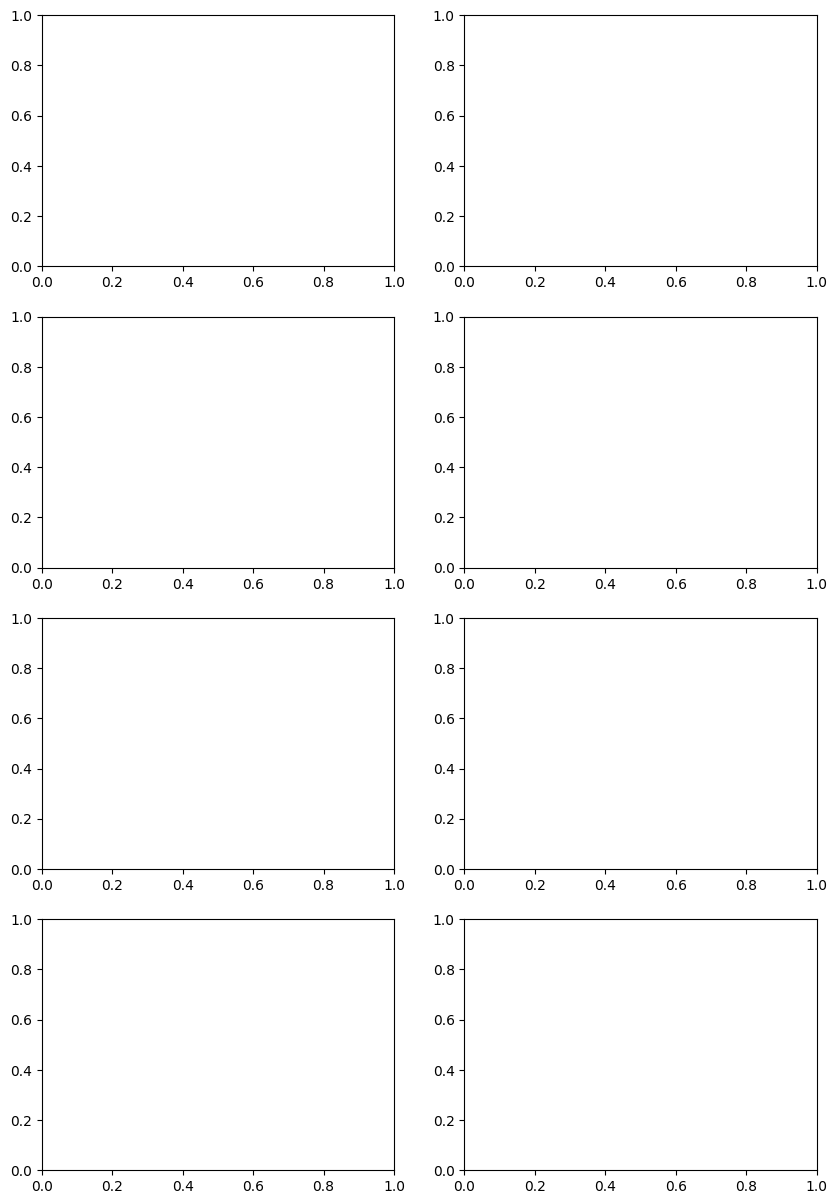

In [106]:
figure, axis = plt.subplots(4, 2, figsize=(10, 15))

## Module Lines Of Code

In [107]:
mloc = m_mods[['DeclarableId', 'D_LOC', 'L_MLOC']]
# mloc = m_mods[['DeclarableId', 'D_LOC', 'S_LOC', 'L_MLOC']]
print(mloc)

                                         DeclarableId  D_LOC  L_MLOC
0                           com.google.gson.JsonArray    281     116
1                    com.google.gson.ToNumberStrategy     15       3
2                         com.google.gson.JsonElement    227      88
3              com.google.gson.ReflectionAccessFilter     72       9
4                    com.google.gson.JsonDeserializer     16       4
..                                                ...    ...     ...
64    com.google.gson.internal.bind.util.ISO8601Utils      0     198
65    com.google.gson.internal.sql.SqlTimeTypeAdapter     41      36
66       com.google.gson.internal.sql.SqlTypesSupport     51      41
67    com.google.gson.internal.sql.SqlDateTypeAdapter     42      38
68  com.google.gson.internal.sql.SqlTimestampTypeA...     25      23

[69 rows x 3 columns]


In [108]:
x1 = mloc['D_LOC']
# x2 = mloc['S_LOC']
x3 = mloc['L_MLOC']

plt = axis[0, 0]

# Plot
plt.hist([x1, x3], bins=np.linspace(0, 1000, 30), density=True, color=['#3C5DA1', '#469B55'], label=['Designite', 'LAMP'])
# plt.hist([x1, x2, x3], bins=np.linspace(0, 1000, 30), density=True, color=['#3C5DA1', '#B53941', '#469B55'], label=['Designite', 'SonarQube', 'LAMP'])
plt.set(title= "MLOC Distribution", xlabel= 'Module Lines of Code', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-MLOC.png')
# plt.show()

## Module Number Of Units

In [109]:
nou = m_mods[['DeclarableId', 'D_NOM', 'L_NOU']]
print(nou)

                                         DeclarableId  D_NOM  L_NOU
0                           com.google.gson.JsonArray     33     33
1                    com.google.gson.ToNumberStrategy      1      1
2                         com.google.gson.JsonElement     23     23
3              com.google.gson.ReflectionAccessFilter      5      1
4                    com.google.gson.JsonDeserializer      1      1
..                                                ...    ...    ...
64    com.google.gson.internal.bind.util.ISO8601Utils      8      8
65    com.google.gson.internal.sql.SqlTimeTypeAdapter      4      3
66       com.google.gson.internal.sql.SqlTypesSupport      3      2
67    com.google.gson.internal.sql.SqlDateTypeAdapter      4      3
68  com.google.gson.internal.sql.SqlTimestampTypeA...      4      3

[69 rows x 3 columns]


In [110]:
x1 = m_mods['D_NOM']
x2 = m_mods['L_NOU']

plt = axis[0, 1]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 50, 30), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
plt.set(title= "NOU Distribution", xlabel= 'Number of Units', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-NOU.png')
# plt.show()

## Module Weighted Method per Class (WMC)

In [111]:
wmc = m_mods[['DeclarableId', 'D_WMC', 'L_WMC']]
print(wmc)

                                         DeclarableId  D_WMC  L_WMC
0                           com.google.gson.JsonArray     37     44
1                    com.google.gson.ToNumberStrategy      1      1
2                         com.google.gson.JsonElement     27     28
3              com.google.gson.ReflectionAccessFilter      5      1
4                    com.google.gson.JsonDeserializer      1      1
..                                                ...    ...    ...
64    com.google.gson.internal.bind.util.ISO8601Utils     37     59
65    com.google.gson.internal.sql.SqlTimeTypeAdapter      6      6
66       com.google.gson.internal.sql.SqlTypesSupport      3      5
67    com.google.gson.internal.sql.SqlDateTypeAdapter      6      6
68  com.google.gson.internal.sql.SqlTimestampTypeA...      5      4

[69 rows x 3 columns]


In [112]:
x1 = m_mods['D_WMC']
x2 = m_mods['L_WMC']


plt = axis[1, 0]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 100, 30), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
plt.set(title= "WMC Distribution", xlabel= 'Weighted Methods per Class', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-WMC.png')
# plt.show()

## Module - Cognitively Weighted Method per Class (CWMC)

In [113]:
# cwmc = m_mods[['DeclarableId', 'S_COCO', 'L_CWMC']].copy()
# print(cwmc)

In [114]:
# cwmc["Diff"] = cwmc["S_COCO"] - cwmc["L_CWMC"]
# print(cwmc.loc[cwmc["Diff"] > 5])

In [115]:
# x1 = m_mods['S_COCO']
# x2 = m_mods['L_CWMC']
#
# plt = axis[1, 1]
#
# # Plot
# plt.hist([x1, x2], bins=np.linspace(0, 100, 30), density=True, color=['#B53941', '#469B55'], label=['SonarQube', 'LAMP'])
# plt.set(title= "CWMC Distribution", xlabel= 'Cognitively Weighted Methods per Class', ylabel='Density')
# plt.legend()
# # plt.savefig('images/lottie-CWMC.png')
# # plt.show()

## Module Depth of Inheritance (DIT)

In [116]:
dit = m_mods[['DeclarableId', 'D_DIT', 'L_DIT']]
print(dit)

                                         DeclarableId  D_DIT  L_DIT
0                           com.google.gson.JsonArray      1      1
1                    com.google.gson.ToNumberStrategy      0      0
2                         com.google.gson.JsonElement      0      0
3              com.google.gson.ReflectionAccessFilter      0      0
4                    com.google.gson.JsonDeserializer      0      0
..                                                ...    ...    ...
64    com.google.gson.internal.bind.util.ISO8601Utils      0      0
65    com.google.gson.internal.sql.SqlTimeTypeAdapter      1      0
66       com.google.gson.internal.sql.SqlTypesSupport      0      0
67    com.google.gson.internal.sql.SqlDateTypeAdapter      1      0
68  com.google.gson.internal.sql.SqlTimestampTypeA...      1      0

[69 rows x 3 columns]


In [117]:
dit["Diff"] = dit["D_DIT"] - dit["L_DIT"]
print(dit.loc[dit["Diff"] > 0])

                                         DeclarableId  D_DIT  L_DIT  Diff
9                   com.google.gson.FieldNamingPolicy      1      0     1
17                     com.google.gson.ToNumberPolicy      1      0     1
41                  com.google.gson.internal.Excluder      1      0     1
49      com.google.gson.internal.bind.DateTypeAdapter      1      0     1
50  com.google.gson.internal.bind.TypeAdapterRunti...      1      0     1
51  com.google.gson.internal.bind.MapTypeAdapterFa...      1      0     1
52      com.google.gson.internal.bind.TreeTypeAdapter      2      0     2
53  com.google.gson.internal.bind.DefaultDateTypeA...      1      0     1
54  com.google.gson.internal.bind.ReflectiveTypeAd...      1      0     1
55  com.google.gson.internal.bind.CollectionTypeAd...      1      0     1
56    com.google.gson.internal.bind.NumberTypeAdapter      1      0     1
57  com.google.gson.internal.bind.SerializationDel...      1      0     1
59  com.google.gson.internal.bind.Json

/var/folders/yg/_h7_f_ps1g53dn06sw9cr3gr0000gn/T/ipykernel_19648/1400901144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dit["Diff"] = dit["D_DIT"] - dit["L_DIT"]


In [118]:
x1 = m_mods['D_DIT']
x2 = m_mods['L_DIT']

plt = axis[1, 1]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 6, 10), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
plt.set(title= "DIT Distribution", xlabel= 'Depth of Inheritance Tree', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-DIT.png')
# plt.show()

## Module - Number of Children

In [119]:
noc = m_mods[['DeclarableId', 'D_NC', 'L_NOC']]
print(noc)

                                         DeclarableId  D_NC  L_NOC
0                           com.google.gson.JsonArray     0      0
1                    com.google.gson.ToNumberStrategy     1      0
2                         com.google.gson.JsonElement     4      4
3              com.google.gson.ReflectionAccessFilter     0      0
4                    com.google.gson.JsonDeserializer     0      0
..                                                ...   ...    ...
64    com.google.gson.internal.bind.util.ISO8601Utils     0      0
65    com.google.gson.internal.sql.SqlTimeTypeAdapter     0      0
66       com.google.gson.internal.sql.SqlTypesSupport     0      0
67    com.google.gson.internal.sql.SqlDateTypeAdapter     0      0
68  com.google.gson.internal.sql.SqlTimestampTypeA...     0      0

[69 rows x 3 columns]


In [120]:
x1 = m_mods['D_NC']
x2 = m_mods['L_NOC']

plt = axis[2, 0]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
plt.set(title= "NOC Distribution", xlabel= 'Number of Children', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-NOC.png')
# plt.show()

## Module - Lack of Cohesion in Methods (LCOM)

In [121]:
lcom = m_mods[['DeclarableId', 'D_LCOM', 'L_LCOM']]
print(lcom)

                                         DeclarableId  D_LCOM  L_LCOM
0                           com.google.gson.JsonArray    0.00       1
1                    com.google.gson.ToNumberStrategy   -1.00       1
2                         com.google.gson.JsonElement   -1.00       1
3              com.google.gson.ReflectionAccessFilter   -1.00       1
4                    com.google.gson.JsonDeserializer   -1.00       1
..                                                ...     ...     ...
64    com.google.gson.internal.bind.util.ISO8601Utils    0.00       1
65    com.google.gson.internal.sql.SqlTimeTypeAdapter    0.75       2
66       com.google.gson.internal.sql.SqlTypesSupport    1.00       2
67    com.google.gson.internal.sql.SqlDateTypeAdapter    0.75       2
68  com.google.gson.internal.sql.SqlTimestampTypeA...    0.50       1

[69 rows x 3 columns]


## Unit - Lines of Code

In [122]:
uloc = m_units[['DeclarableId', 'D_LOC', 'L_ULOC']]
print(uloc)

                                           DeclarableId  D_LOC  L_ULOC
0                 com.google.gson.JsonArray://JsonArray      3       3
1                 com.google.gson.JsonArray://JsonArray      3       3
2                 com.google.gson.JsonArray://JsonArray      3       3
3                 com.google.gson.JsonArray://JsonArray      3       3
4                  com.google.gson.JsonArray://deepCopy     10      10
...                                                 ...    ...     ...
1010  com.google.gson.internal.sql.SqlDateTypeAdapte...     17      15
1011  com.google.gson.internal.sql.SqlDateTypeAdapte...     11      10
1012  com.google.gson.internal.sql.SqlTimestampTypeA...      3       3
1013  com.google.gson.internal.sql.SqlTimestampTypeA...      4       4
1014  com.google.gson.internal.sql.SqlTimestampTypeA...      3       3

[1015 rows x 3 columns]


## Unit - Cyclomatic Complexity

In [123]:
cc = m_units[['DeclarableId', 'D_CC', 'L_CC']]
print(cc)

                                           DeclarableId  D_CC  L_CC
0                 com.google.gson.JsonArray://JsonArray     1     1
1                 com.google.gson.JsonArray://JsonArray     1     1
2                 com.google.gson.JsonArray://JsonArray     1     1
3                 com.google.gson.JsonArray://JsonArray     1     1
4                  com.google.gson.JsonArray://deepCopy     3     3
...                                                 ...   ...   ...
1010  com.google.gson.internal.sql.SqlDateTypeAdapte...     2     3
1011  com.google.gson.internal.sql.SqlDateTypeAdapte...     2     2
1012  com.google.gson.internal.sql.SqlTimestampTypeA...     1     1
1013  com.google.gson.internal.sql.SqlTimestampTypeA...     1     2
1014  com.google.gson.internal.sql.SqlTimestampTypeA...     1     1

[1015 rows x 3 columns]


In [124]:
x1 = m_units['D_CC']
x2 = m_units['L_CC']

plt = axis[2, 1]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
plt.set(title= "CC Distribution", xlabel= 'Cyclomatic Complexity', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-CC.png')
# plt.show()

## Unit - Parameter Count

In [125]:
pc = m_units[['DeclarableId', 'D_PC', 'L_PC']]
print(pc)

                                           DeclarableId  D_PC  L_PC
0                 com.google.gson.JsonArray://JsonArray     0     0
1                 com.google.gson.JsonArray://JsonArray     0     1
2                 com.google.gson.JsonArray://JsonArray     1     0
3                 com.google.gson.JsonArray://JsonArray     1     1
4                  com.google.gson.JsonArray://deepCopy     0     0
...                                                 ...   ...   ...
1010  com.google.gson.internal.sql.SqlDateTypeAdapte...     1     1
1011  com.google.gson.internal.sql.SqlDateTypeAdapte...     2     2
1012  com.google.gson.internal.sql.SqlTimestampTypeA...     1     1
1013  com.google.gson.internal.sql.SqlTimestampTypeA...     1     1
1014  com.google.gson.internal.sql.SqlTimestampTypeA...     2     2

[1015 rows x 3 columns]


In [126]:
x1 = m_units['D_PC']
x2 = m_units['L_PC']

plt = axis[3, 0]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True, color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
plt.set(title= "PC Distribution", xlabel= 'Parameter Count', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-PC.png')
# plt.show()

In [127]:
figure.delaxes(axis[3, 1])

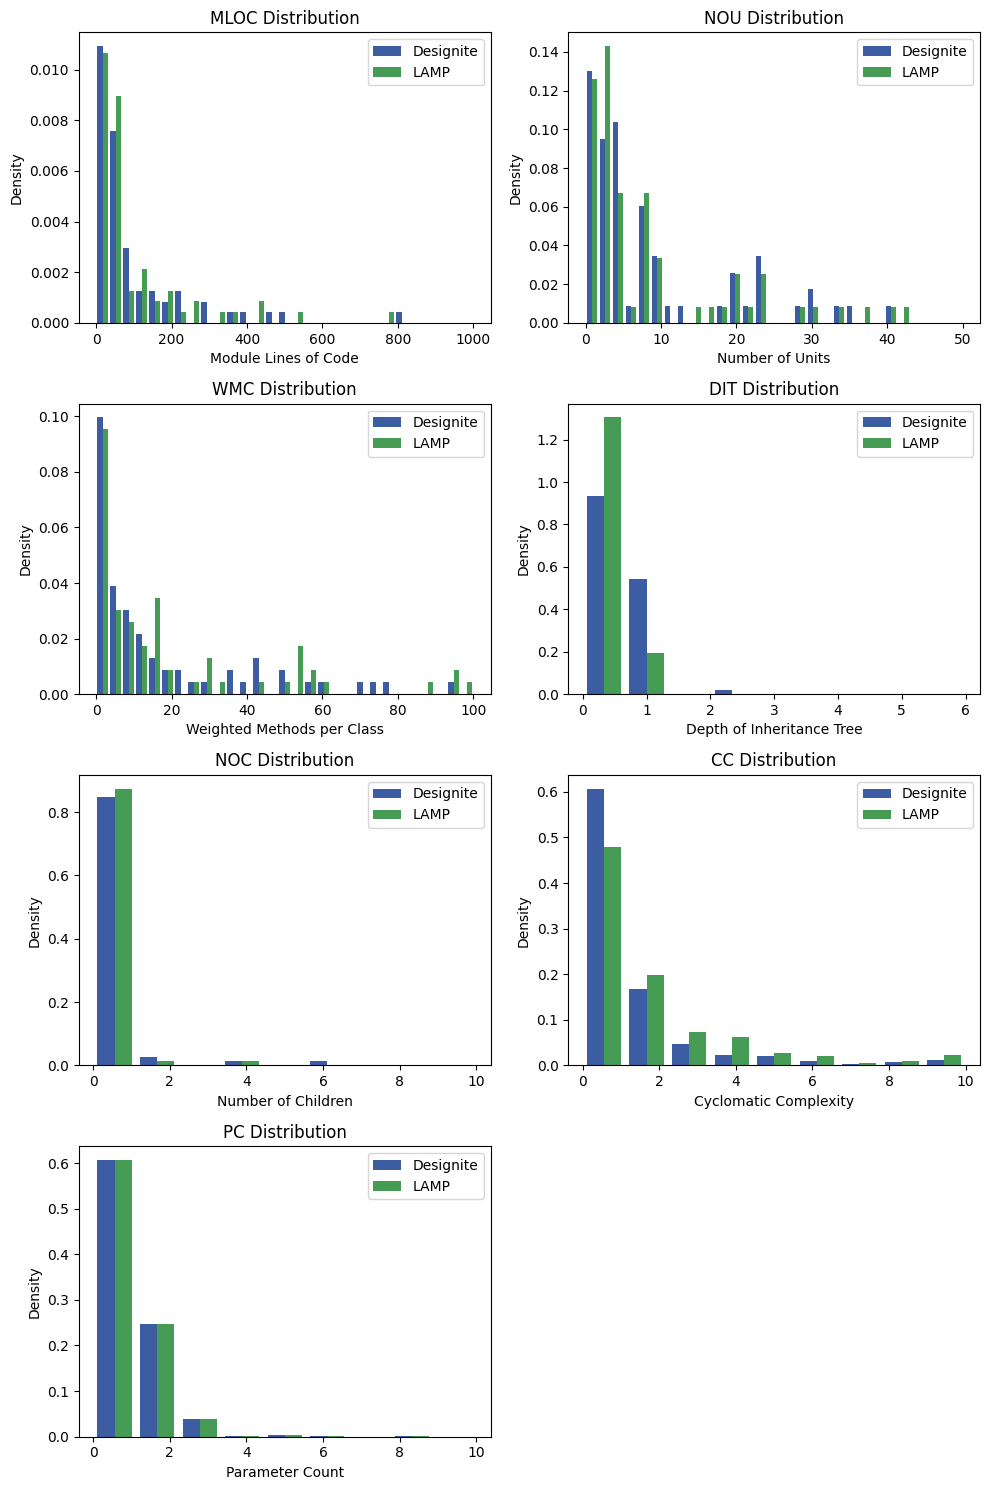

In [128]:
figure.tight_layout()
figure.savefig('images/gson-metrics.png')
figure